# Test de Normalidad

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
tickers = ['MSFT','SPY']

start = '2010-01-01'
end = '2022-08-31'

data = yf.download(tickers,start,end)['Adj Close']


[*********************100%***********************]  2 of 2 completed


In [3]:
data

,MSFT,SPY
Date,,
2010-01-04,23.522564,87.791794
2010-01-05,23.530161,88.024193
2010-01-06,23.385765,88.086166
2010-01-07,23.142555,88.457977
2010-01-08,23.302160,88.752350
...,...,...
2022-08-24,273.151184,407.023407
2022-08-25,276.181885,412.769562
2022-08-26,265.524841,398.797699


In [4]:
log_returns = np.log(data/data.shift()).dropna()

In [5]:
log_returns

,MSFT,SPY
Date,,
2010-01-05,0.000323,0.002644
2010-01-06,-0.006156,0.000704
2010-01-07,-0.010454,0.004212
2010-01-08,0.006873,0.003322
2010-01-11,-0.012802,0.001396
...,...,...
2022-08-24,-0.002354,0.003196
2022-08-25,0.011034,0.014019
2022-08-26,-0.039351,-0.034435


array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'SPY'}>]], dtype=object)

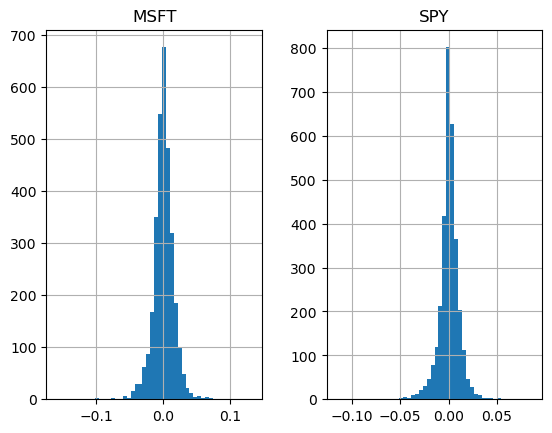

In [6]:
log_returns.hist(bins=50)

#### Test Jarque-Bera
basado en asimetría y curtosis

In [7]:
test_normal_jb = sms.jarque_bera(log_returns.SPY)
test_normal_jb

(20445.96627516384, 0.0, -0.8057059935405377, 15.305361829376459)

In [8]:
labels_test_jb = ['Jarque_Bera','p-value','asimetria','curtosis']

In [9]:
pd.Series(test_normal_jb , labels_test_jb)

Jarque_Bera    20445.966275
p-value            0.000000
asimetria         -0.805706
curtosis          15.305362
dtype: float64

#### Test Anderson-Darling
basado en la función de distribución empírica

In [10]:
test_ad = sms.normal_ad(log_returns.SPY)
test_ad

(67.77784239284983, 0.0)

In [11]:
labels_test_ad = ['Anderson-darling','p-value']

In [12]:
pd.Series(test_ad , labels_test_ad)

Anderson-darling    67.777842
p-value              0.000000
dtype: float64

## Distribución empírica

In [13]:
x = np.sort(log_returns.SPY)

In [14]:
y = np.arange(1, len(x)+1) / len(x)

In [15]:
y

array([3.13873195e-04, 6.27746390e-04, 9.41619586e-04, ...,
       9.99372254e-01, 9.99686127e-01, 1.00000000e+00])

In [16]:
retornos_teoricos = np.random.normal(log_returns.SPY.mean(),log_returns.SPY.std(),10000)

In [17]:
x_t = np.sort(retornos_teoricos)
y_t = np.arange(1 , len(retornos_teoricos) +1) / len(retornos_teoricos)

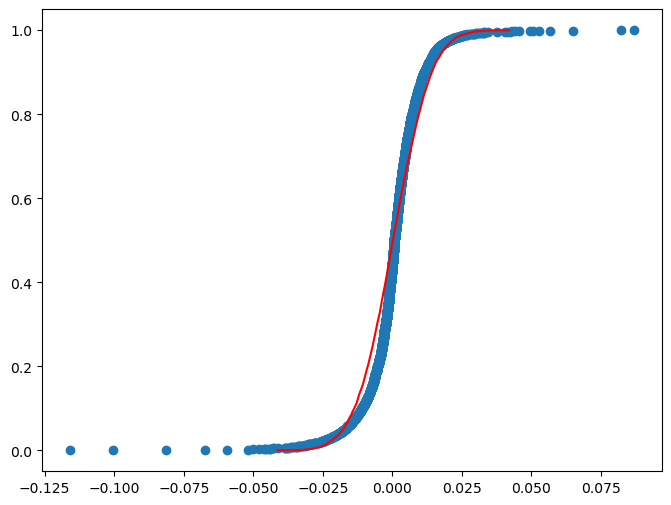

In [18]:
fig, ax=plt.subplots(figsize=(8,6))
ax.scatter(x,y)
ax.plot(x_t,y_t , color = 'red')
plt.show()

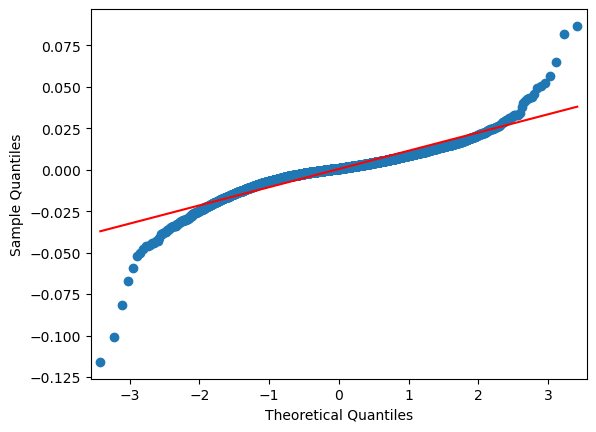

In [19]:
sm.qqplot(log_returns.SPY , line = 's')
plt.show()

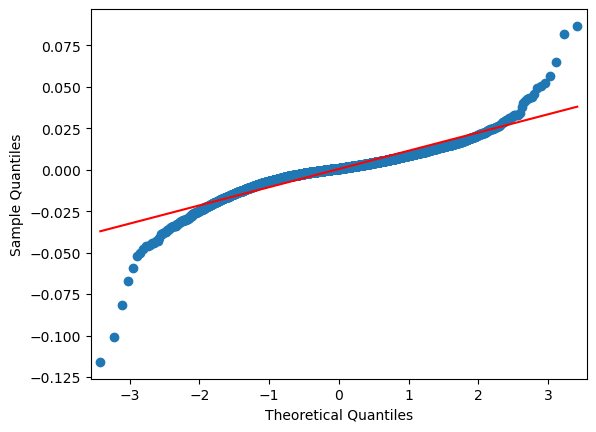

In [20]:
sm.qqplot(x , line = 's')
plt.show()

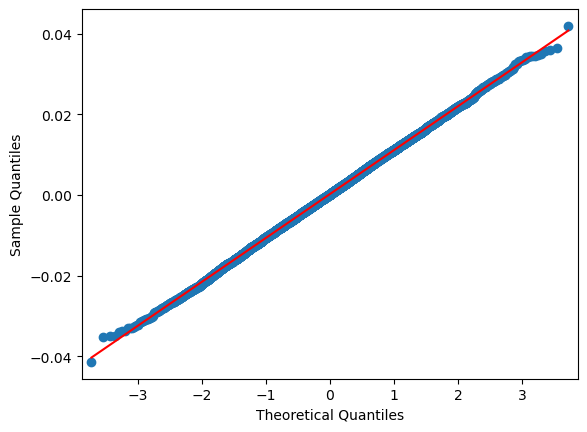

In [21]:
sm.qqplot(x_t , line = 's')
plt.show()

In [22]:
import estadisticas as est

est.est_basicas(log_returns.SPY)

Estadísticas básicas:
------------------------------
          size      3186.00000
           min        -0.11589
           max         0.08673
          mean         0.00047
           std         0.01099
          skew        -0.80571
      kurtosis        12.30536


Prueba de Normalidad
H0: skew , kurtosis , normal
------------------------------
Skew of data set          -0.806
Skew test p-value          0.000
Kurt of data set          12.305
Kurt test p-value          0.000
Norm test p-value          0.000


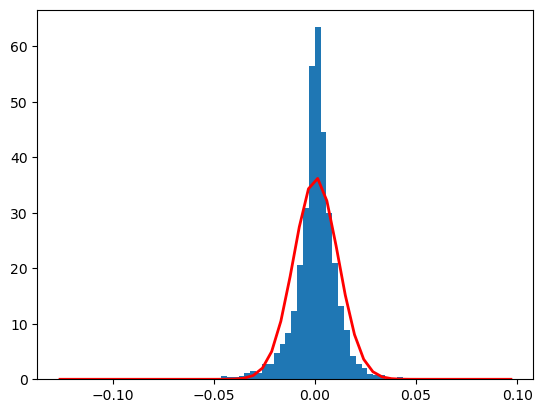

In [23]:
est.dis_normal(log_returns.SPY)

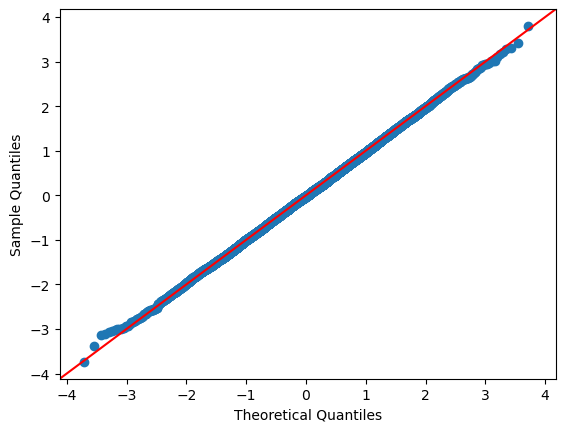

In [24]:
n = 10000

np.random.seed(0)
data = np.random.normal(0,1,n) # Conjunto de datos que siguen una distribución normal

import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.qqplot(data, line='45') #gráfico Q-Q con una línea de 45 grados
plt.show()

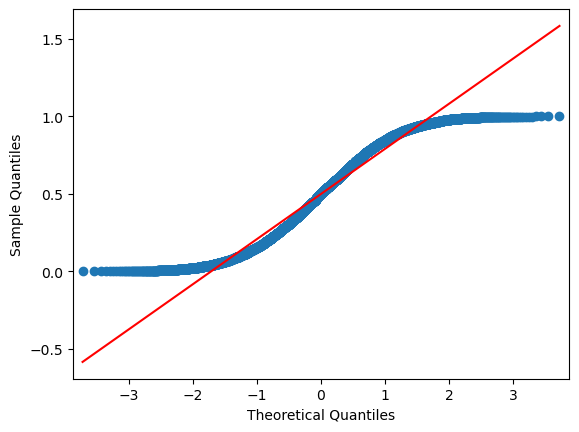

In [25]:
data = np.random.uniform(0,1,n) #Conjunto de datos distribuidos uniformemente

fig = sm.qqplot(data, line='s')
plt.show()